In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
# from tensorflow import keras
# from tensorflow.keras import layers
from math import sqrt
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [8]:
df = pd.read_csv(r'C:\Users\nasut\OneDrive\Documents\Kuliah\Semester 7\PKKM\BMKG\Project\Data\data_fix_prec.txt')

In [10]:
y = df["prec_obs"] 
df = df.drop(["prec_obs.group","prec_nwp.group", "Date", "prec_obs", "LAT", "LON"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [ ]:
n = df.describe()

In [9]:
df

,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,ELEV,prec_nwp
1,96001,27.3973,21.6059,70.8014,3.433260,12.4580,0.553781,0.000000,0.000000,100564.0,...,0.767220,281.622,-5.20890,11.0889,6.22327,57.5841,0,12,126,0.000000
2,96001,27.0090,21.5161,72.0376,3.049010,27.2450,0.640686,0.000000,0.000000,100481.0,...,0.653591,250.969,-5.05963,12.7044,5.96761,59.9813,0,12,126,0.000000
3,96001,26.5672,21.4226,73.5149,2.045560,37.3569,0.717464,0.000000,0.000000,100265.0,...,0.823568,227.030,-4.89987,15.2381,7.04134,67.3222,0,12,126,0.000000
4,96001,26.4519,21.5400,74.5507,2.225080,20.1816,0.698006,0.000000,0.000000,100462.0,...,0.492229,120.120,-4.72228,16.3007,7.54606,65.4942,0,12,126,0.000000
5,96001,26.7230,21.3691,72.6038,2.342680,14.7934,0.626203,0.000000,0.000000,100667.0,...,1.688550,137.419,-4.64246,19.0442,8.93947,73.4932,0,12,126,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543968,99992,29.7642,23.4001,68.8035,3.721340,261.5040,0.390150,0.488739,0.327736,100401.0,...,6.484750,260.471,-4.69787,73.0758,2.29511,231.9670,0,12,41,0.003601
543969,99992,30.7901,24.1140,67.7143,5.811930,263.9440,0.536106,0.653845,0.377421,100234.0,...,7.014090,248.417,-4.63960,75.7922,2.05083,268.5790,0,12,41,3.669660
543970,99992,28.8450,24.1964,76.1178,5.839920,268.8950,0.229447,0.570225,0.455976,100067.0,...,8.068280,248.233,-4.40575,77.1489,2.52709,272.9220,0,12,41,4.045040
543971,99992,25.8334,23.9709,89.6050,0.500122,210.7490,0.087511,0.292942,0.447494,100218.0,...,7.675180,256.296,-4.33471,76.3170,3.07955,259.2500,1,12,41,0.000000


In [11]:
left_skewed_cols = ["dew2m.degC.", "rh2m...", "lcloud...", "surpre.Pa.", "wamix.kg.kg.", "outlr.W.m2.", "rh950...", "rh800...", "rh500..."]
for col in left_skewed_cols:
    df[col], _ = stats.boxcox(df[col] + 1)  

right_skewed_cols = ["wspeed.m.s.", "pblh.m.", "lifcl.m.",  "ws950.m.s.", "ws800.m.s.", "ws500.m.s."]
for col in right_skewed_cols:
    df[col] = np.log(df[col])  



c:\Users\nasut\anaconda3\envs\PyCaretEnv\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\nasut\anaconda3\envs\PyCaretEnv\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
c:\Users\nasut\anaconda3\envs\PyCaretEnv\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


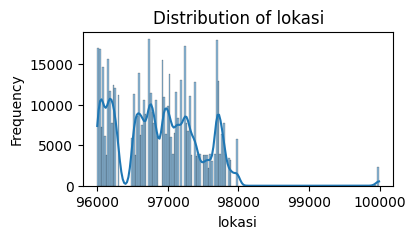

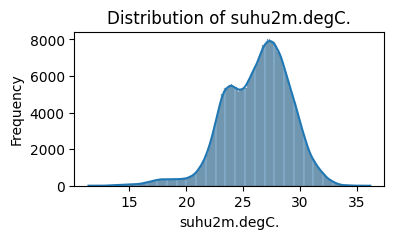

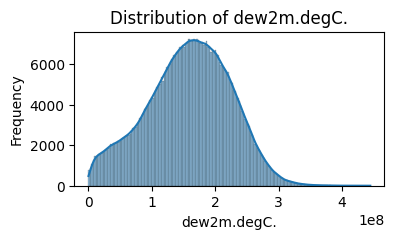

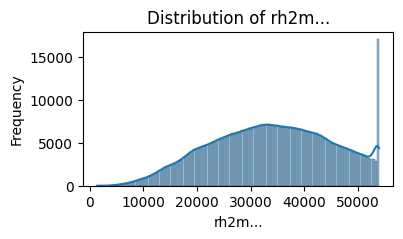

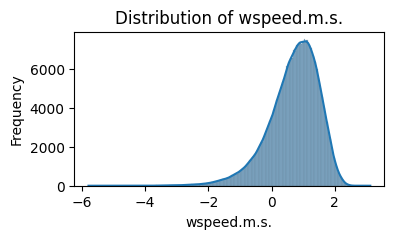

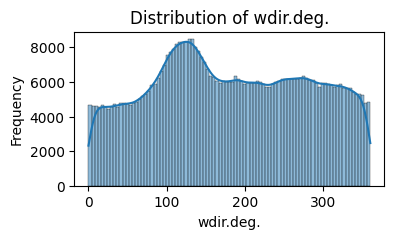

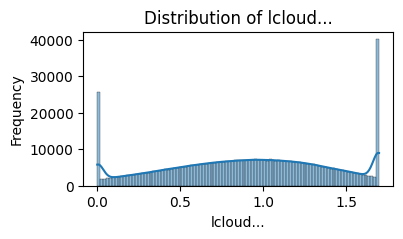

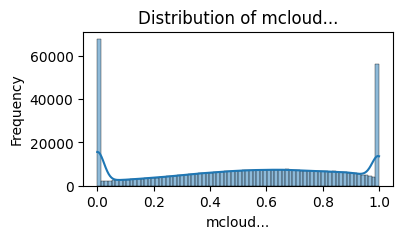

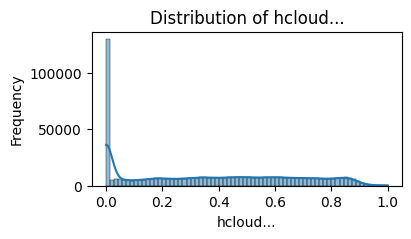

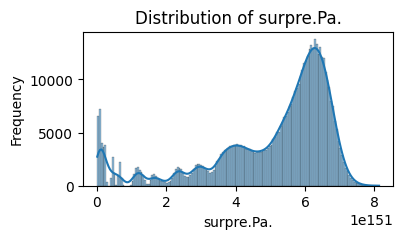

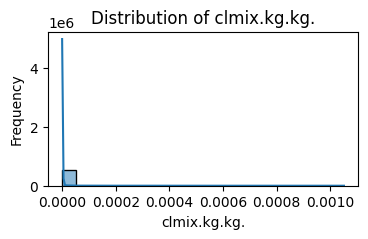

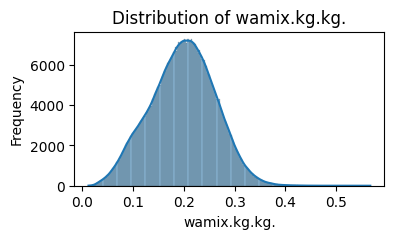

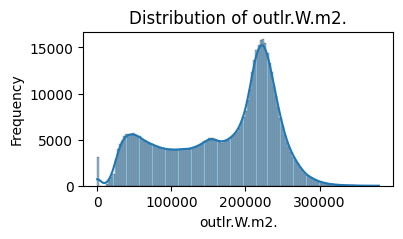

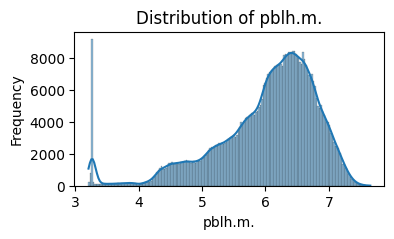

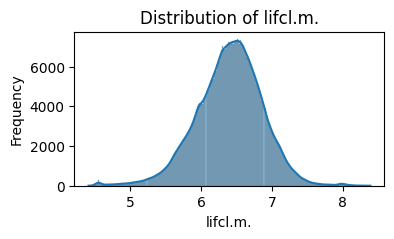

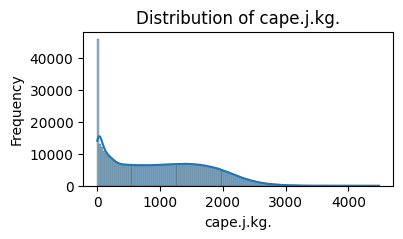

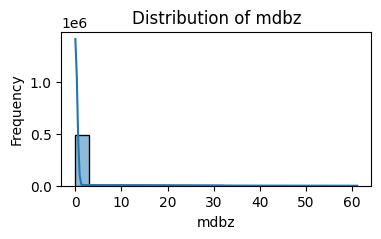

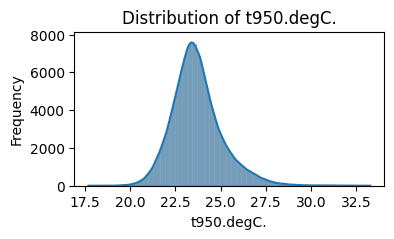

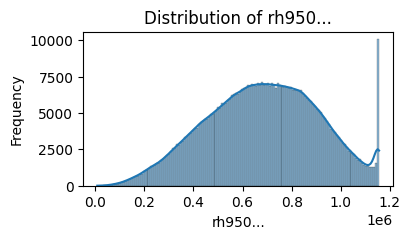

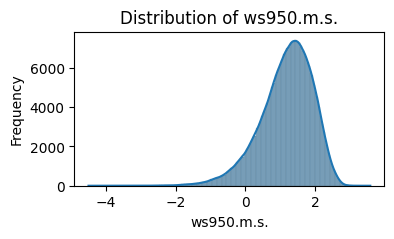

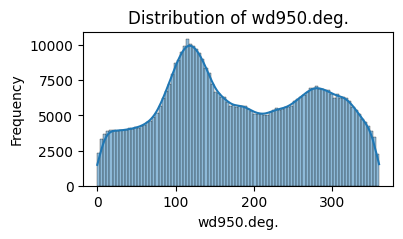

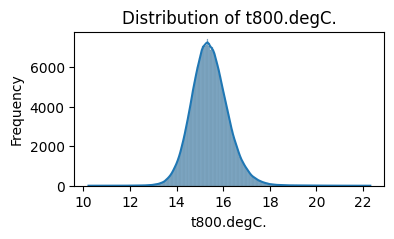

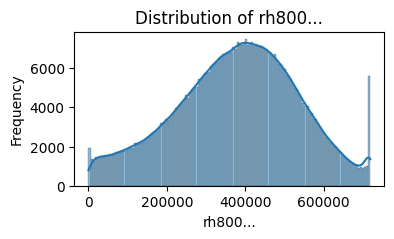

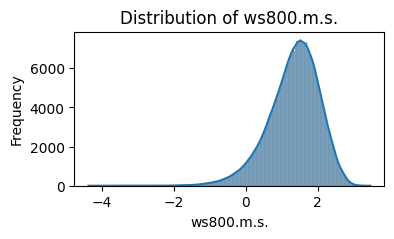

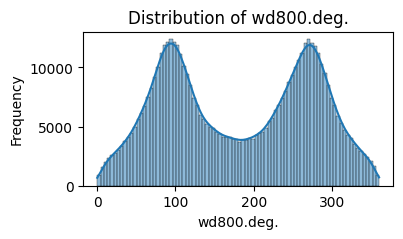

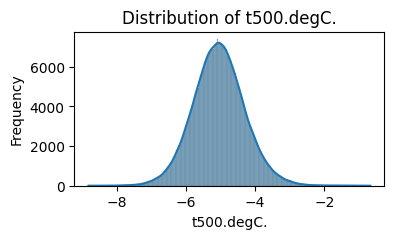

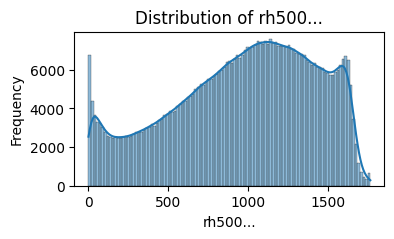

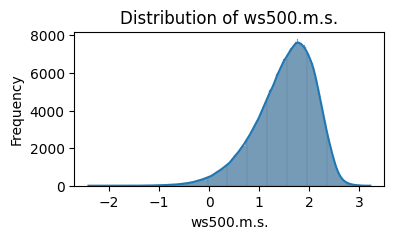

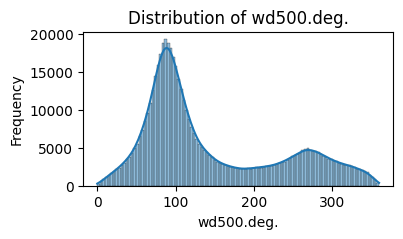

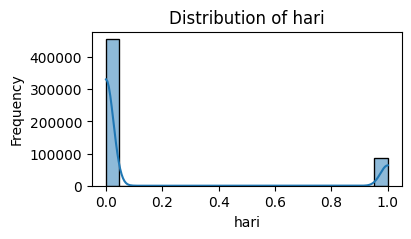

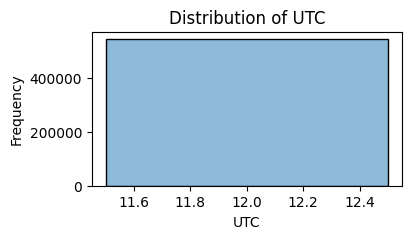

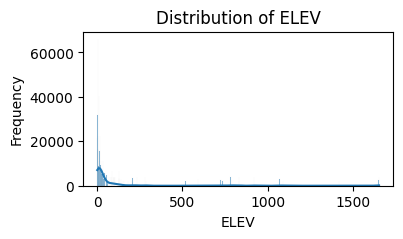

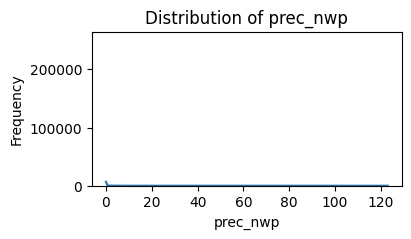

In [12]:
for column in df.columns:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

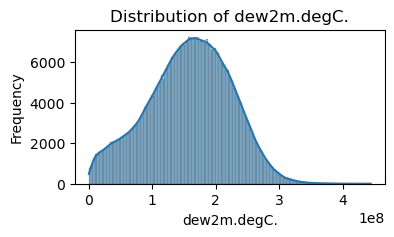

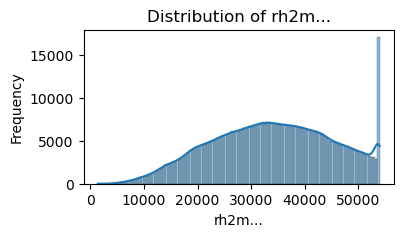

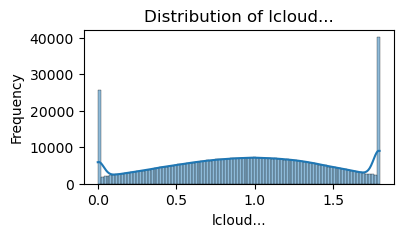

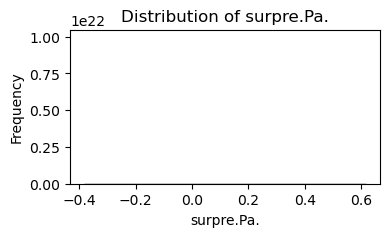

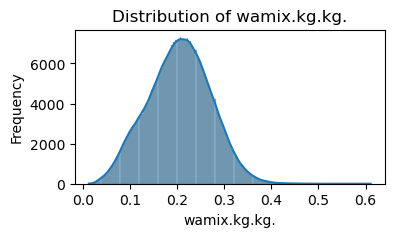

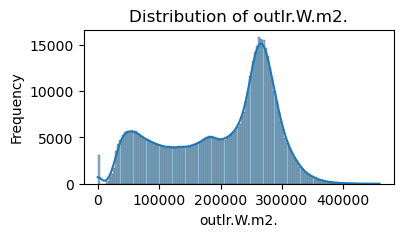

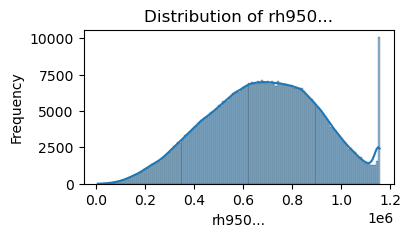

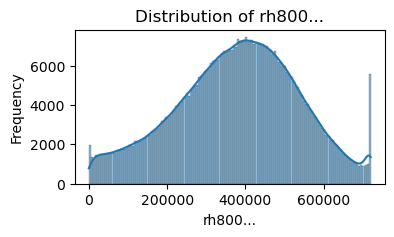

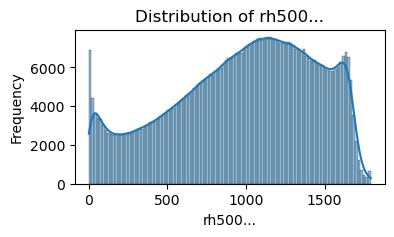

In [21]:
for column in left_skewed_cols:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [7]:
sns.displot(df)


In [34]:
for x in right_skewed_cols + left_skewed_cols:
    iqr = df[x].quantile(0.75) - df[x].quantile(0.25)
    lower_bound = df[x].quantile(0.25) - (1.5 * iqr)
    upper_bound = df[x].quantile(0.75) + (1.5 * iqr)
    outliers = df[x].loc[(df[x] < lower_bound) | (df[x] > upper_bound)]

# Remove the outlier
df = df.drop(outliers.index)

In [36]:
bimodal_cols = ["wd500.deg.", "wd800.deg.", "wd950.deg."]
num_bins = 5
for col in bimodal_cols:
    df[col] = pd.cut(df[col], bins=num_bins, labels=False)

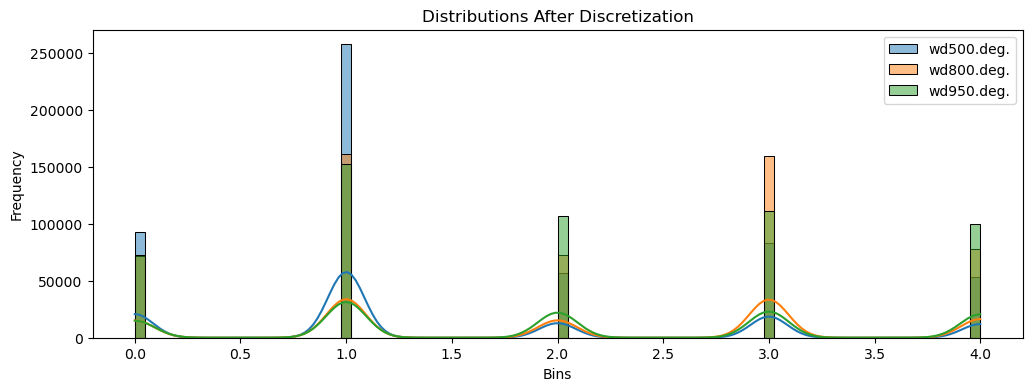

In [44]:
plt.figure(figsize=(12, 4))
for col in bimodal_cols:
    sns.histplot(df[col], kde=True, label=col)
plt.title("Distributions After Discretization")
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [45]:
df.columns

Index(['lokasi', 'suhu2m.degC.', 'dew2m.degC.', 'rh2m...', 'wspeed.m.s.',
       'wdir.deg.', 'lcloud...', 'mcloud...', 'hcloud...', 'surpre.Pa.',
       'clmix.kg.kg.', 'wamix.kg.kg.', 'outlr.W.m2.', 'pblh.m.', 'lifcl.m.',
       'cape.j.kg.', 'mdbz', 't950.degC.', 'rh950...', 'ws950.m.s.',
       'wd950.deg.', 't800.degC.', 'rh800...', 'ws800.m.s.', 'wd800.deg.',
       't500.degC.', 'rh500...', 'ws500.m.s.', 'wd500.deg.', 'hari', 'UTC',
       'ELEV', 'prec_nwp'],
      dtype='object')

In [54]:
df['rh800...']

1           5281.445224
2           2946.019836
3           2740.325187
4           3696.460324
5           3726.137928
              ...      
543968    461424.290760
543969    461295.974454
543970    404094.412189
543971    360029.318611
543972    292721.479368
Name: rh800..., Length: 543972, dtype: float64

In [63]:
iqr = np.percentile(df['rh800...'], 75) - np.percentile(df['rh800...'], 25)
outliers = df['rh800...'][df['rh800...'] < np.percentile(df['rh800...'], 25) - 1.5 * iqr]
outliers = outliers.append(df['rh800...'][df['rh800...'] > np.percentile(df['rh800...'], 75) + 1.5 * iqr])

# Remove outliers from the data
df = df.dropna(subset=['rh800...'])

C:\Users\ihsan\AppData\Local\Temp\ipykernel_14432\226085961.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(df['rh800...'][df['rh800...'] > np.percentile(df['rh800...'], 75) + 1.5 * iqr])


In [62]:
df_filtered['rh800...']

1           5281.445224
2           2946.019836
3           2740.325187
4           3696.460324
5           3726.137928
              ...      
543968    461424.290760
543969    461295.974454
543970    404094.412189
543971    360029.318611
543972    292721.479368
Name: rh800..., Length: 543972, dtype: float64

In [65]:
plt.hist(df['rh800...'], bins=50)
plt.plot(np.sort(df['rh800...']), np.exp(np.diff(stats.gaussian_kde(df['rh800...']).evaluate(np.sort(df['rh800...'])))), color='red')
plt.xlabel('rh800...')
plt.ylabel('Density')
plt.title('KDE plot of rh800...')
plt.show()

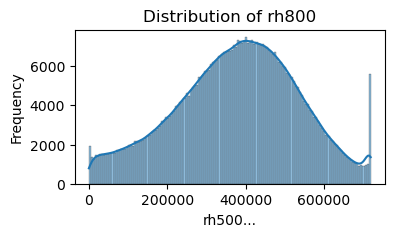

In [64]:
plt.figure(figsize=(4, 2))
sns.histplot(df['rh800...'], kde=True)
plt.title(f'Distribution of rh800')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

In [13]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create and train the XGBoost regressor
modelxgb = XGBRegressor()
modelxgb.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_xgb = modelxgb.predict(x_test_scaled)

# Calculate root mean squared error (RMSE)
mae = mean_absolute_error(y_test, y_pred_xgb)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Train score:")
print(modelxgb.score(x_train_scaled, y_train))
print("Test score:")
print(modelxgb.score(x_test_scaled, y_test))

Mean Absolute Error (MAE): 1.69
Root Mean Squared Error (RMSE): 5.24
Train score:
0.2538176900948679
Test score:
0.04411801659802894
